In [1]:
library(data.table)
library(ggplot2)

In [8]:
ram = fread('50_samples_max_rss.grep', sep=':')
d = fread('50_samples.acc_mbases_mbytes.tsv')
setnames(ram, 'V2','ram_kb')
setnames(d, c('acc','mbases','mbytes'))
ram[1:3]

V1,ram_kb
<chr>,<int>
singlem-4krq6-SRR10617119/max_rss,184888
singlem-4xbr6-SRR531672/max_rss,187968
singlem-6cgc2-SRR9966528/max_rss,240156


In [9]:
ram[, acc := gsub('.*\\-','',gsub('/max_rss','',V1))]
ram[1:3]

V1,ram_kb,acc
<chr>,<int>,<chr>
singlem-4krq6-SRR10617119/max_rss,184888,SRR10617119
singlem-4xbr6-SRR531672/max_rss,187968,SRR531672
singlem-6cgc2-SRR9966528/max_rss,240156,SRR9966528


In [10]:
d[1:3]

acc,mbases,mbytes
<chr>,<int>,<int>
ERR2738607,808,483
SRR8427863,2434,1647
SRR9212111,3564,1167


In [12]:
m = merge(d, ram[,.(ram_kb,acc)], by='acc')
m[1:3]

acc,mbases,mbytes,ram_kb
<chr>,<int>,<int>,<int>
ERR2560573,2130,827,233428
ERR2738607,808,483,195224
ERR3192203,3892,1788,267164


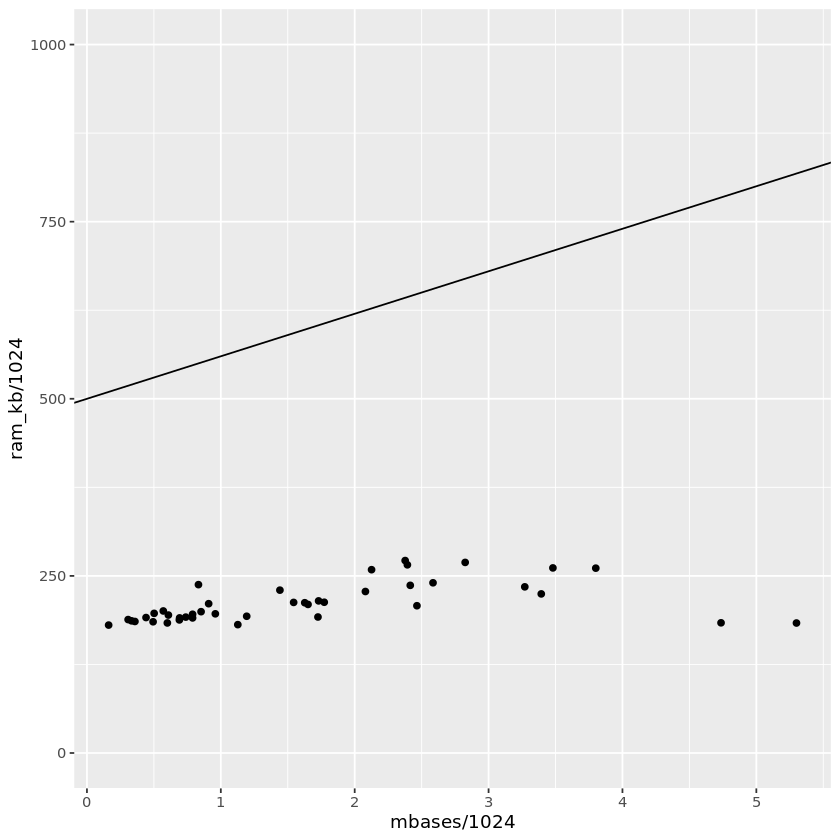

In [25]:
qplot(data=m, mbases/1024, ram_kb/1024, ylim=c(0,1000))+geom_abline(slope=3000/50, intercept=500)

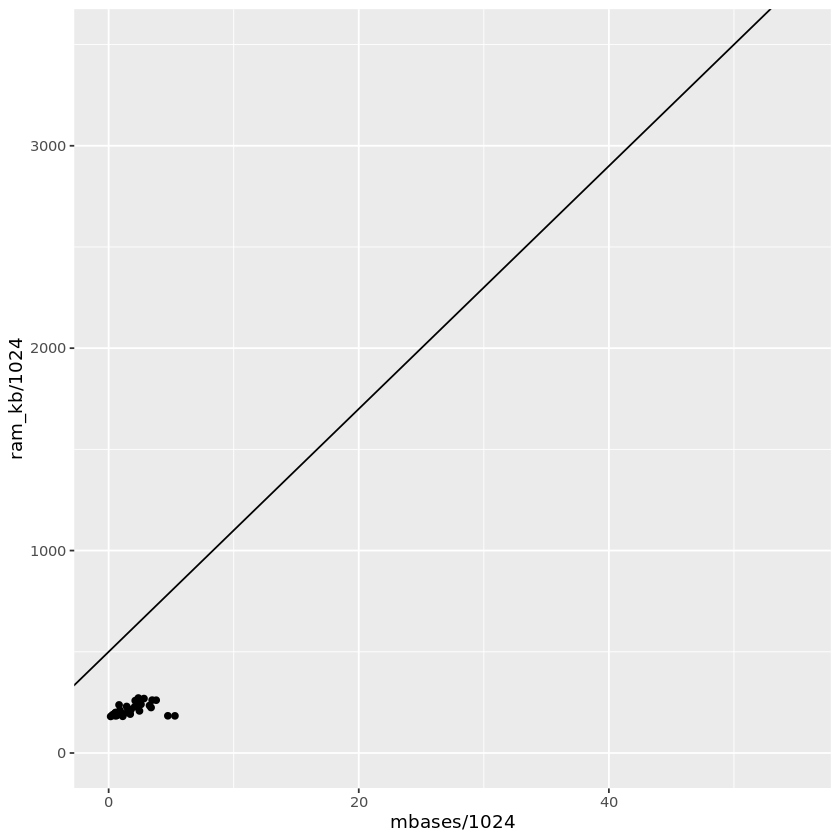

In [24]:
qplot(data=m, mbases/1024, ram_kb/1024, ylim=c(0,3500), xlim=c(0,55))+geom_abline(slope=3000/50, intercept=500)

In [ ]:
# => so settle on ram_kb = (mbases/1024*3000/50 + 500) * 1024